In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


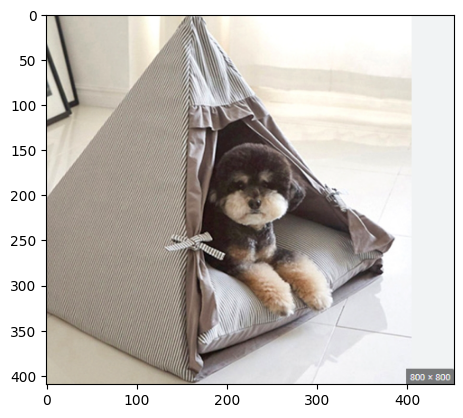

In [3]:
# Load image
img_path = '/content/drive/MyDrive/Samples/dog.PNG'
img = image.load_img(img_path)
plt.imshow(img)

(410, 410)


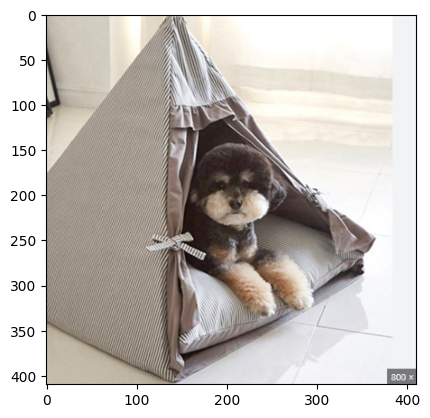

In [4]:
# Center cropping
w, h = img.size
s = min(w, h)
x = (w - s) // 2
y = (h - s) // 2
img = img.crop((x, y, x+s, y+s))
print(img.size)
plt.imshow(np.asarray(img))

### **VGG16**

In [5]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

(224, 224)


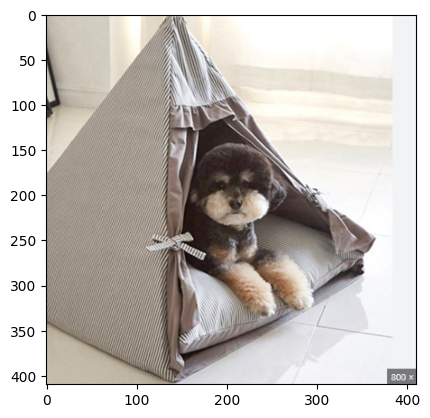

In [6]:
# Resize image
target_size = (224, 224)
img_vgg = img.resize(target_size)
print(img_vgg.size)
plt.imshow(np.asarray(img))

In [7]:
# Transform into array
x_vgg = image.img_to_array(img_vgg)
print(x_vgg.shape)

(224, 224, 3)


In [8]:
# Add batch dimension
x_vgg = np.expand_dims(x_vgg, axis=0)
print(x_vgg.shape)

(1, 224, 224, 3)


In [9]:
# Preprocess the image
x_vgg = preprocess_input(x_vgg)

In [10]:
# Load VGG16 model
model_vgg = VGG16(weights='imagenet', include_top=True)

553467096/553467096 [==============================] - 5s 0us/step


In [11]:
# Predict class of the image
prediction_vgg = model_vgg.predict(x_vgg)
print('VGG16 predicted:', decode_predictions(prediction_vgg, top=3)[0])

35363/35363 [==============================] - 0s 0us/step
VGG16 predicted: [('n02971356', 'carton', 0.6265852), ('n03291819', 'envelope', 0.04948693), ('n04507155', 'umbrella', 0.024474163)]


### **InceptionV3**

In [12]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

(299, 299)


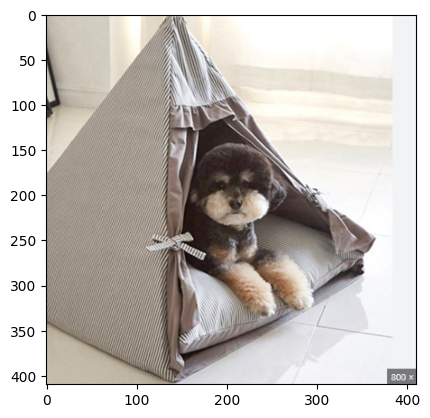

In [13]:
# Resize image
target_size = (299, 299)
img_inception = img.resize(target_size)
print(img_inception.size)
plt.imshow(np.asarray(img))

In [18]:
# Transform into array
x_inception = image.img_to_array(img_inception)
print(x_inception.shape)

(299, 299, 3)


In [19]:
# Add batch dimension
x_inception = np.expand_dims(x_inception, axis=0)
print(x_inception.shape)

(1, 299, 299, 3)


In [20]:
# Preprocess the image
x_inception = preprocess_input(x_inception)

In [21]:
# Load InceptionV3 model
model_inception = InceptionV3(weights='imagenet', include_top=True)

96112376/96112376 [==============================] - 2s 0us/step


In [22]:
# Predict the image
prediction_inception = model_inception.predict(x_inception)
print('InceptionV3 predicted:', decode_predictions(prediction_inception, top=3)[0])

1/1 [==============================] - 2s 2s/step
InceptionV3 predicted: [('n02113624', 'toy_poodle', 0.08363882), ('n02971356', 'carton', 0.06394724), ('n03125729', 'cradle', 0.03738999)]


### **ResNet50**

In [23]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

(224, 224)


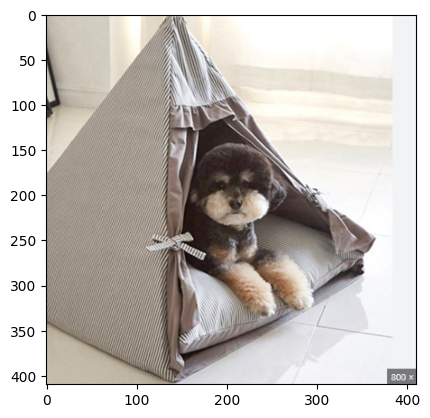

In [24]:
# Resize image
target_size = (224, 224)
img_resnet = img.resize(target_size)
print(img_resnet.size)
plt.imshow(np.asarray(img))

In [28]:
# Transform into array
x_resnet = image.img_to_array(img_resnet)
print(x_resnet.shape)

(224, 224, 3)


In [29]:
# Add batch dimension
x_resnet = np.expand_dims(x_resnet, axis=0)
print(x_resnet.shape)

(1, 224, 224, 3)


In [30]:
# Preprocess the image
x_resnet = preprocess_input(x_resnet)

In [31]:
# Load ResNet50 model
model_resnet = ResNet50(weights='imagenet', include_top=True)

102967424/102967424 [==============================] - 1s 0us/step


In [32]:
# Predict the image
prediction_resnet = model_resnet.predict(x_resnet)
print('ResNet50 predicted:', decode_predictions(prediction_resnet, top=3)[0])

1/1 [==============================] - 2s 2s/step
ResNet50 predicted: [('n02110063', 'malamute', 0.27184463), ('n02971356', 'carton', 0.20806111), ('n04399382', 'teddy', 0.16948529)]
